## IROS 2021 Paper, Sim runs in Unreal Maze Environment

Minimum data size for each run is 256


(0.0, 15.0)

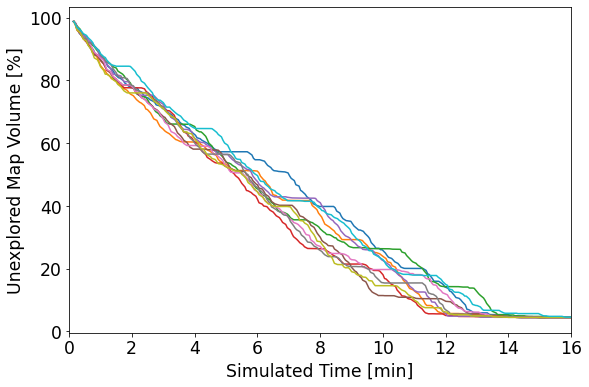

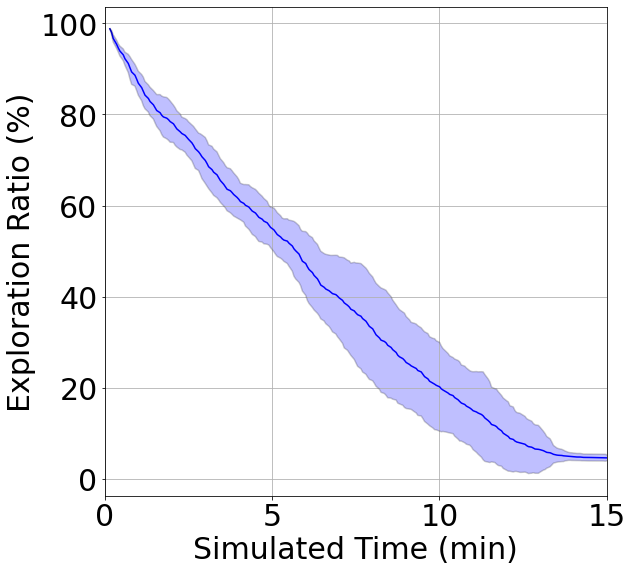

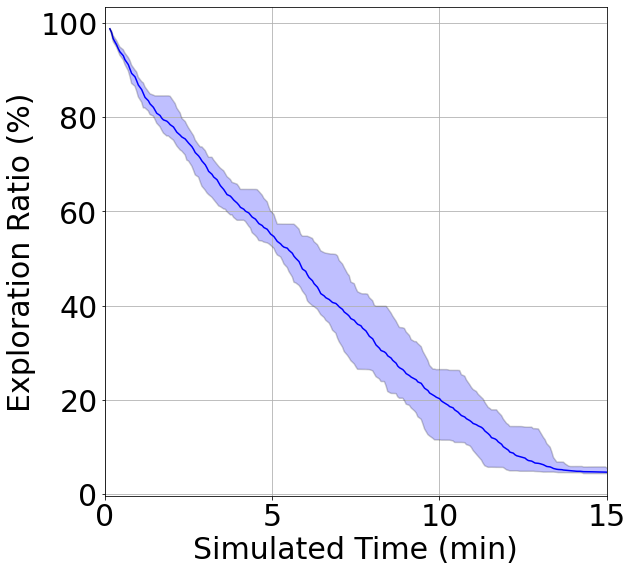

In [14]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def getDataSetSize(path, filename, first_test, last_test):
    for test_number in range(first_test, last_test):
        data = np.array(np.genfromtxt(path + "/" + filename + str(test_number) + "_map.csv", delimiter=",", skip_header=1))
        if (test_number == first_test):
            data_set_size = data.shape[0]
        else:
            data_set_size = np.min((data_set_size, data.shape[0]))
    return data_set_size

data_path = "/home/andrew/tests/data/unreal_maze"
full_map_volume = 39.6*39.6*2.8 # meters

voxel_size = 0.2
N_tests = 10
first_test = 0
data_set_size = getDataSetSize(data_path, "unreal_maze_ifve_iros_test", first_test, N_tests)
print("Minimum data size for each run is %d" % data_set_size)

fig, ax = plt.subplots(figsize=[9.0, 6.0])
ax.tick_params(axis='both', which='major', labelsize='xx-large')
plt.xlabel("Simulated Time [min]", fontsize='xx-large')
plt.ylabel("Unexplored Map Volume [%]", fontsize='xx-large')
plt.xlim(0, 16)

for i in range(first_test, N_tests):
    data_filename = "unreal_maze_ifve_iros_test" + str(i) + "_map.csv"
    data = np.array(np.genfromtxt(data_path + "/" + data_filename, delimiter=",", skip_header=1))
    t = data[:data_set_size,0]/60.0
    map_data = (1-(voxel_size**3)*data[:data_set_size,1]/full_map_volume)*100
    map_data
    plt.plot(t, map_data)
    if (i == first_test):
        map_volume_ratios = map_data
    else:
        map_volume_ratios = np.vstack((map_volume_ratios, map_data))

map_volume_ratios_mean = np.mean(map_volume_ratios, axis=0)
map_volume_ratios_std_dev = np.std(map_volume_ratios, axis=0)
map_volume_rations_min = np.min(map_volume_ratios, axis=0)
map_volume_rations_max = np.max(map_volume_ratios, axis=0)

fig, ax = plt.subplots(figsize=[9.0, 9.0])
ax.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.xlabel("Simulated Time (min)", fontsize=30)
plt.ylabel("Exploration Ratio (%)", fontsize=30)
plt.plot(t, map_volume_ratios_mean, "b", label="ifve")
plt.plot(t, map_volume_ratios_mean - 2*map_volume_ratios_std_dev, "k", alpha=0.2)
plt.plot(t, map_volume_ratios_mean + 2*map_volume_ratios_std_dev, "k", alpha=0.2)
ax.fill_between(t, map_volume_ratios_mean - 2*map_volume_ratios_std_dev, map_volume_ratios_mean + 2*map_volume_ratios_std_dev, alpha=0.25, facecolor="blue")
plt.xlim(0, 15)

fig, ax = plt.subplots(figsize=[9.0, 9.0])
ax.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.xlabel("Simulated Time (min)", fontsize=30)
plt.ylabel("Exploration Ratio (%)", fontsize=30)
plt.plot(t, map_volume_ratios_mean, "b", label="ifve")
plt.plot(t, map_volume_rations_min, "k", alpha=0.2)
plt.plot(t, map_volume_rations_max, "k", alpha=0.2)
ax.fill_between(t, map_volume_rations_min, map_volume_rations_max, alpha=0.25, facecolor="blue")
plt.xlim(0, 15)
